In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Посмотрите формат таблиц

In [69]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Астане  48 non-null     object 
 1   T                       48 non-null     float64
 2   Po                      48 non-null     float64
 3   P                       48 non-null     float64
 4   Pa                      48 non-null     float64
 5   U                       48 non-null     int64  
 6   DD                      48 non-null     object 
 7   Ff                      48 non-null     int64  
 8   ff10                    0 non-null      float64
 9   ff3                     0 non-null      float64
 10  N                       48 non-null     object 
 11  WW                      48 non-null     object 
 12  W1                      21 non-null     object 
 13  W2                      21 non-null     object 
 14  Tn                      6 non-null      floa

None

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,RRR,tR,E,Tg,sss
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,0.0,0.0,6.00000,12.000000,20.000000,48.000000,4.00000,4.0,0.0,0.0,6.000000
mean,-13.108333,741.316667,775.970833,-0.214583,58.583333,1.541667,NaN,NaN,-17.70000,-8.625000,7.450000,-19.931250,0.80000,12.0,NaN,NaN,15.000000
std,4.342655,4.293455,4.849784,0.486407,16.507681,1.687984,NaN,NaN,3.07961,2.989109,3.268268,5.514359,0.23094,0.0,NaN,NaN,0.632456
min,-22.700000,733.000000,766.200000,-1.300000,31.000000,0.000000,NaN,NaN,-22.70000,-13.600000,1.000000,-26.500000,0.60000,12.0,NaN,NaN,14.000000
25%,-15.950000,737.775000,772.375000,-0.525000,46.500000,0.000000,NaN,NaN,-18.85000,-10.700000,4.000000,-23.100000,0.60000,12.0,NaN,NaN,15.000000
50%,-13.700000,743.550000,778.300000,-0.200000,55.000000,1.000000,NaN,NaN,-17.45000,-7.900000,10.000000,-21.950000,0.80000,12.0,NaN,NaN,15.000000
75%,-10.725000,744.825000,779.875000,0.100000,71.000000,3.000000,NaN,NaN,-15.90000,-6.500000,10.000000,-20.400000,1.00000,12.0,NaN,NaN,15.000000
max,-5.000000,745.600000,781.600000,0.900000,88.000000,5.000000,NaN,NaN,-13.90000,-5.000000,10.000000,-6.700000,1.00000,12.0,NaN,NaN,16.000000


Сразу переведем столбец "Дата" в правильный формат

In [33]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [34]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()

Вывести несколько первых строк сгруппированных данных

In [7]:
display(grouped_df.head())

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

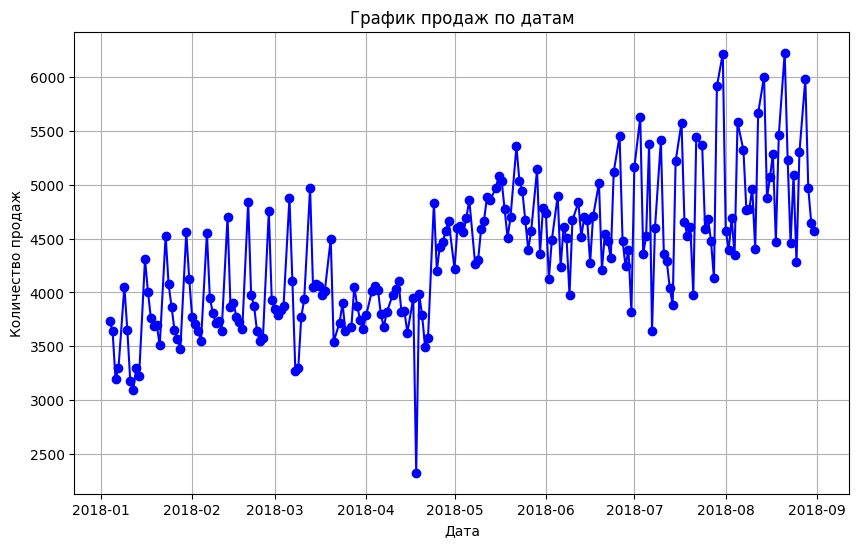

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='b')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('График продаж по датам')
plt.grid(True)

Опишите что вы видите на графике. Ваша задача - максимально описать график

### На графике представлена динамика количества продаж по датам в период с января 2018 года по сентябрь 2018 года.

**Общий тренд:**

Наблюдается общий восходящий тренд в количестве продаж. В начале периода (январь 2018) количество продаж находилось на уровне около 3500–4000 единиц, а к концу периода (август 2018) этот показатель вырос до диапазона 5000–6000 единиц.
Флуктуации и сезонность:

График демонстрирует значительные колебания в количестве продаж на ежедневной основе. Можно заметить, что значения изменяются почти хаотично, поднимаясь и опускаясь, но при этом сохраняется общая тенденция к росту.
В начале марта 2018 года можно заметить резкое падение количества продаж ниже 3000, что является существенным отклонением от обычных значений.
После этого резкого снижения, с мая по август 2018 года, наблюдается восстановление и резкий рост, что может свидетельствовать о сезонных или промо-активностях, направленных на стимулирование спроса.
Пики и минимумы:

В графике видно несколько локальных максимумов, когда количество продаж достигает почти 6000 единиц. Эти пики могут свидетельствовать о выходных, праздничных днях или периодах повышенной покупательской активности.
Локальные минимумы также заметны, в частности, в конце апреля и начале мая, что может свидетельствовать о временных спадах или снижении покупательской активности.
Аномалии и выбросы:

В графике виден один резкий спад в апреле 2018 года, где количество продаж падает до менее 2500 единиц, что значительно ниже обычных значений. Это может быть вызвано внешними факторами, такими как технические проблемы, сбои в работе системы или другие неожиданные события.
Ускорение роста:

В середине лета (июль и август) график демонстрирует более активный рост и увеличенные флуктуации, что может свидетельствовать о летнем сезоне или других активностях, стимулирующих спрос. Также заметно, что пиковые значения стали выше, чем в начале периода.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > upper_bound]
max_outliers = outliers[outliers['Количество'] == outliers['Количество'].max()]
display(max_outliers)

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
df_filtered = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6,7,8])) &
    (df['Дата'].dt.weekday == 2)
]

top_product = df_filtered.groupby('Номенклатура').agg({'Количество': 'sum'}).reset_index()

top_product = top_product.sort_values(by='Количество', ascending=False).head(1)
print(top_product)

  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [55]:
df = pd.read_excel('data1.xls', skiprows=6)

display(df.head(1))

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,09.01.2018 23:00,-5.0,733.0,766.2,-0.9,88,"Ветер, дующий с юга",5,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-6.7,0.6,12.0,NaN,NaN,NaN,NaN


In [56]:
weather_df = df.loc[:, ['Местное время в Астане', 'T']]
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'])
weather_daily = weather_df.groupby(weather_df['Местное время в Астане'].dt.date).agg({'T': 'mean'}).reset_index()
weather_daily.rename(columns={'Местное время в Астане': 'Дата'}, inplace=True)
weather_daily.head(1)

,Дата,T
0,2018-04-01,-14.075


In [57]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [58]:
merged_df = pd.merge(grouped_df, weather_daily, on='Дата', how='inner')

,Дата,Количество,T
0,2018-04-01,3786,-14.075


In [59]:
merged_df

,Дата,Количество,T
0,2018-04-01,3786,-14.0750
1,2018-05-01,4221,-16.8625
2,2018-06-01,4736,-13.3000
3,2018-07-01,5163,-12.7500
4,2018-08-01,4574,-15.4125


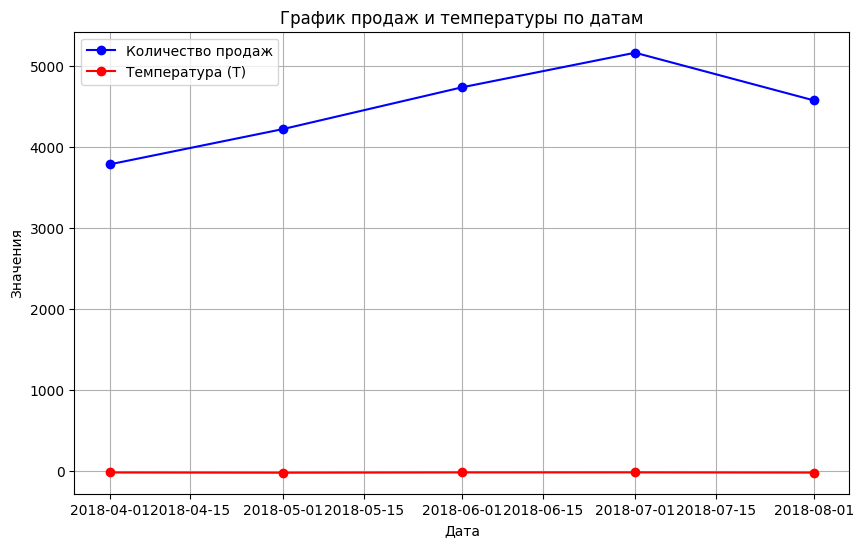

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['Количество'], marker='o', linestyle='-', color='b', label='Количество продаж')
plt.plot(merged_df['Дата'], merged_df['T'], marker='o', linestyle='-', color='r', label='Температура (T)')
plt.title('График продаж и температуры по датам')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

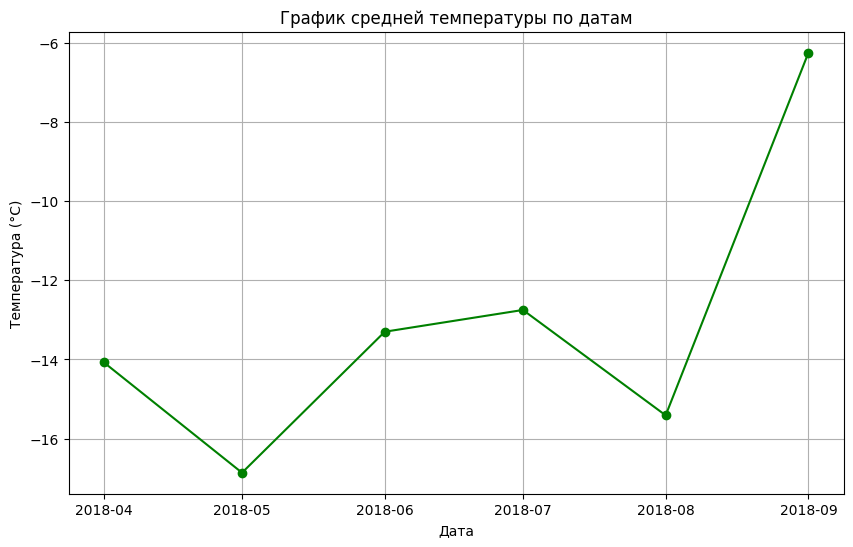

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(weather_daily['Дата'], weather_daily['T'], marker='o', linestyle='-', color='g')
plt.title('График средней температуры по датам')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.show()